In [2]:
%run tools.ipynb

In [13]:
# Wang's data
#fname = '../data/ozone/wang/ozone mass ratio_2016_hourly.nc'
fname = '../data/ozone/wang/ozone.nc'
ds = xr.open_dataset(fname)
#ds = ds.rename({"longitude":"lon", "latitude":"lat"})
ds['lon'] = ds['lon'] - 180
ds

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 720, time: 8784)
Coordinates:
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 2016-01-01 ... 2016-12-31T23:00:00
Data variables:
    o3       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Jan 14 22:50:21 2021: cdo remapbil,grid ozone mass rati...
    CDO:          Climate Data Operators version 1.7.2 (http://mpimet.mpg.de/...

In [14]:
# plot XY range
lat1 = 18
lat2 = 55
lon1 = 72 #+ 180
lon2 = 135 #+ 180

In [16]:
dr_tmp = ds['o3'].sel(lat = slice(lat1, lat2), lon = slice(lon1, lon2))
dr_tmp_scaled = dr_tmp.mean(dim = 'time')*1e9
#dr_tmp_scaled

<xarray.DataArray 'o3' (lat: 75, lon: 127)>
array([[63.040382, 62.801975, 62.49747 , ..., 62.053253, 62.163155,
        62.27431 ],
       [63.626472, 63.354816, 63.01397 , ..., 62.4204  , 62.511326,
        62.619705],
       [64.10773 , 63.828545, 63.477783, ..., 62.794334, 62.863636,
        62.95688 ],
       ...,
       [81.7441  , 81.92006 , 82.06962 , ..., 83.68635 , 83.61144 ,
        83.55048 ],
       [82.0057  , 82.16103 , 82.295   , ..., 83.78248 , 83.69712 ,
        83.62912 ],
       [82.24875 , 82.41327 , 82.54267 , ..., 83.8952  , 83.80987 ,
        83.742096]], dtype=float32)
Coordinates:
  * lon      (lon) float64 72.0 72.5 73.0 73.5 74.0 ... 133.5 134.0 134.5 135.0
  * lat      (lat) float64 18.0 18.5 19.0 19.5 20.0 ... 53.0 53.5 54.0 54.5 55.0

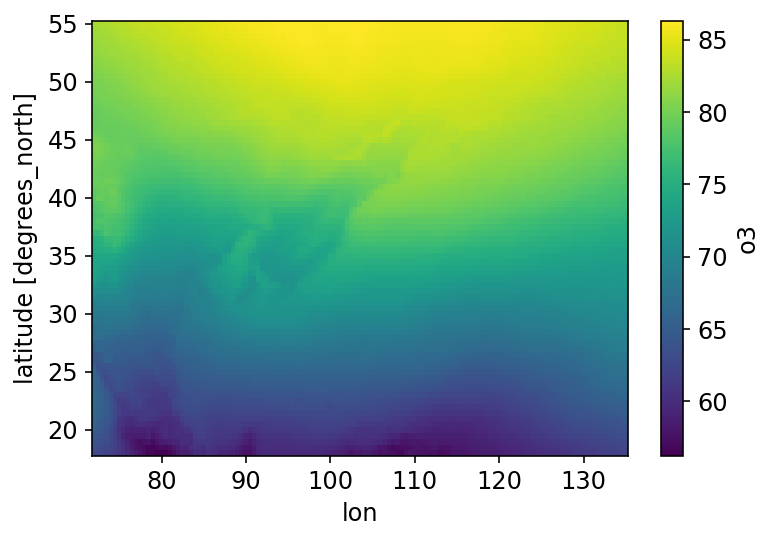

In [18]:
dr_tmp_scaled.plot()

In [20]:
# China provincial borders 
with open(r'/Users/mehliyarsadiq/Desktop/ozone_crop/data/CN-border-La.dat') as src:
    context = ''.join([line for line in src if not line.startswith('#')])
    blocks = [cnt for cnt in context.split('>') if len(cnt) > 0]
    borders = [np.fromstring(block, dtype=float, sep=' ') for block in blocks]


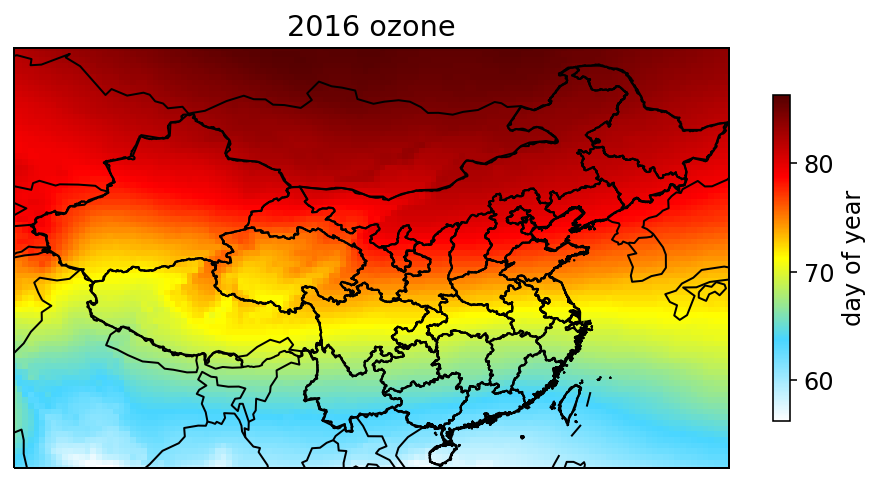

In [22]:
import cartopy.feature as cfeature

fig = plt.figure(figsize=[8, 6])
proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)
ax.coastlines()
dr_tmp_scaled.plot(ax = ax,
                  transform=ccrs.PlateCarree(), 
                  cmap=WhGrYlRd, 
                  #vmin = 200,
                  #vmax = 320,
                  cbar_kwargs={'shrink': 0.5, 'label': 'day of year'})

ax.set_xlim(lon1,lon2)
ax.set_ylim(lat1,lat2)
ax.set_title('2016 ozone')
ax.add_feature(cfeature.BORDERS)

# China borders
for line in borders:
    ax.plot(line[0::2], line[1::2], '-', lw=1, color='k',transform=ccrs.Geodetic())
